In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import os 
if os.path.basename(os.getcwd()) == "notebooks": os.chdir("..")
import datajoint as dj
dj.conn()

[2023-03-08 14:58:07,164][INFO]: Connecting root@localhost:3306
[2023-03-08 14:58:07,207][INFO]: Connected root@localhost:3306


DataJoint connection (connected) root@localhost:3306

In [2]:
from datetime import datetime
from pathlib import Path
from workflow.pipeline import ephys, probe, induction, lineage, analysis

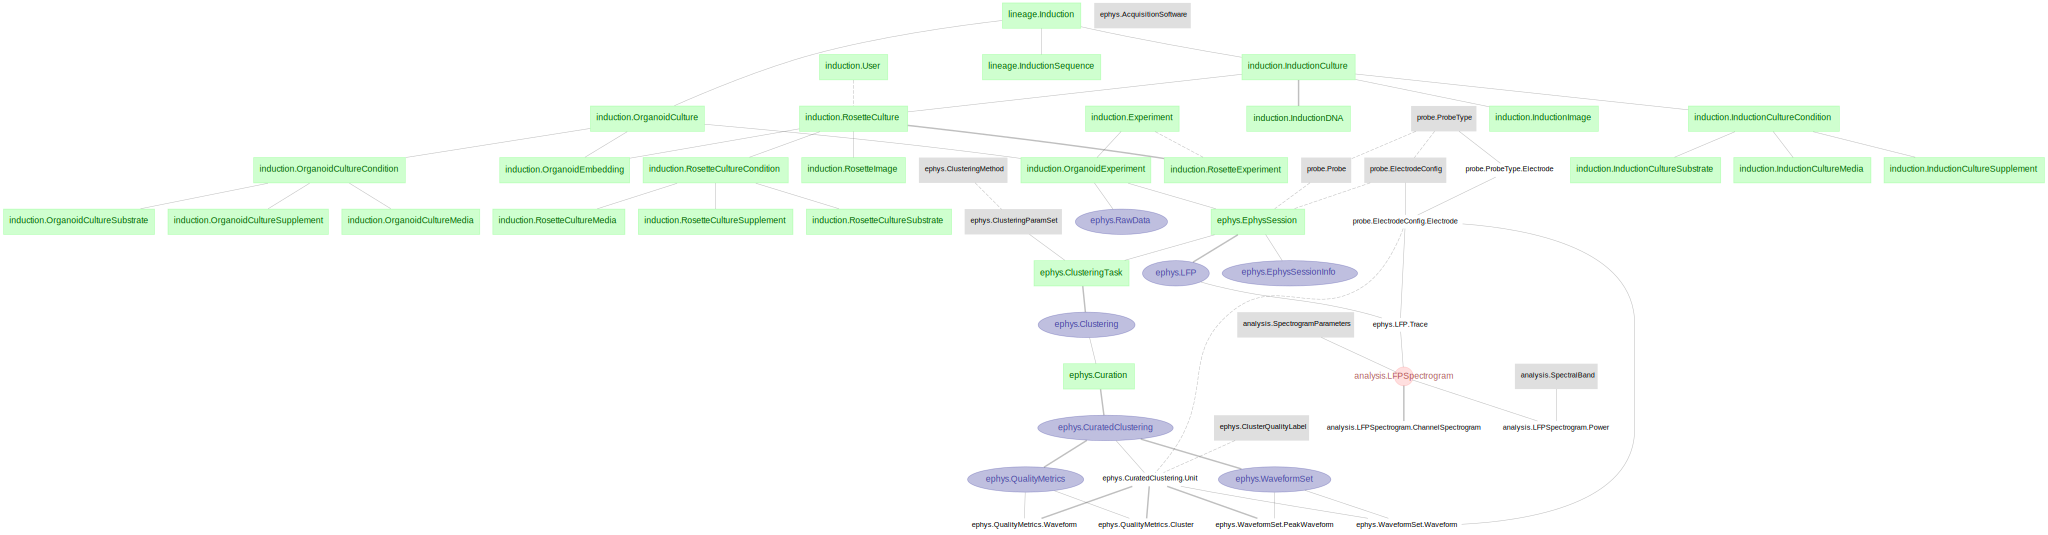

In [3]:
dj.Diagram(induction) + dj.Diagram(lineage) + dj.Diagram(ephys) + dj.Diagram(probe) + dj.Diagram(analysis)

In [4]:
ephys.LFP.Trace()

induction_id de-identified code,matrigel_id,"experiment_id i.e. rosette id and organoid id, e.g. AS001",experiment_datetime Experiment start time,insertion_number,start_time,end_time,electrode_config_hash,probe_type e.g. neuropixels_1.0,"electrode electrode index, starts at 0",lfp
O6,1,O6,2019-07-22 20:43:31,0,2019-07-22 20:43:31,2019-07-22 20:46:31,f2b8cfac-94cd-2564-da65-60493543f043,NeuroNexus-A4x16-Poly2-5mm,5,=BLOB=
O6,1,O6,2019-07-22 20:43:31,0,2019-07-22 20:43:31,2019-07-22 20:46:31,f2b8cfac-94cd-2564-da65-60493543f043,NeuroNexus-A4x16-Poly2-5mm,9,=BLOB=
O6,1,O6,2019-07-22 20:43:31,0,2019-07-22 20:43:31,2019-07-22 20:46:31,f2b8cfac-94cd-2564-da65-60493543f043,NeuroNexus-A4x16-Poly2-5mm,11,=BLOB=
O6,1,O6,2019-07-22 20:43:31,0,2019-07-22 20:43:31,2019-07-22 20:46:31,f2b8cfac-94cd-2564-da65-60493543f043,NeuroNexus-A4x16-Poly2-5mm,6,=BLOB=
O6,1,O6,2019-07-22 20:43:31,0,2019-07-22 20:43:31,2019-07-22 20:46:31,f2b8cfac-94cd-2564-da65-60493543f043,NeuroNexus-A4x16-Poly2-5mm,15,=BLOB=
O6,1,O6,2019-07-22 20:43:31,0,2019-07-22 20:43:31,2019-07-22 20:46:31,f2b8cfac-94cd-2564-da65-60493543f043,NeuroNexus-A4x16-Poly2-5mm,7,=BLOB=
O6,1,O6,2019-07-22 20:43:31,0,2019-07-22 20:43:31,2019-07-22 20:46:31,f2b8cfac-94cd-2564-da65-60493543f043,NeuroNexus-A4x16-Poly2-5mm,2,=BLOB=
O6,1,O6,2019-07-22 20:43:31,0,2019-07-22 20:43:31,2019-07-22 20:46:31,f2b8cfac-94cd-2564-da65-60493543f043,NeuroNexus-A4x16-Poly2-5mm,12,=BLOB=
O6,1,O6,2019-07-22 20:43:31,0,2019-07-22 20:43:31,2019-07-22 20:46:31,f2b8cfac-94cd-2564-da65-60493543f043,NeuroNexus-A4x16-Poly2-5mm,0,=BLOB=
O6,1,O6,2019-07-22 20:43:31,0,2019-07-22 20:43:31,2019-07-22 20:46:31,f2b8cfac-94cd-2564-da65-60493543f043,NeuroNexus-A4x16-Poly2-5mm,3,=BLOB=


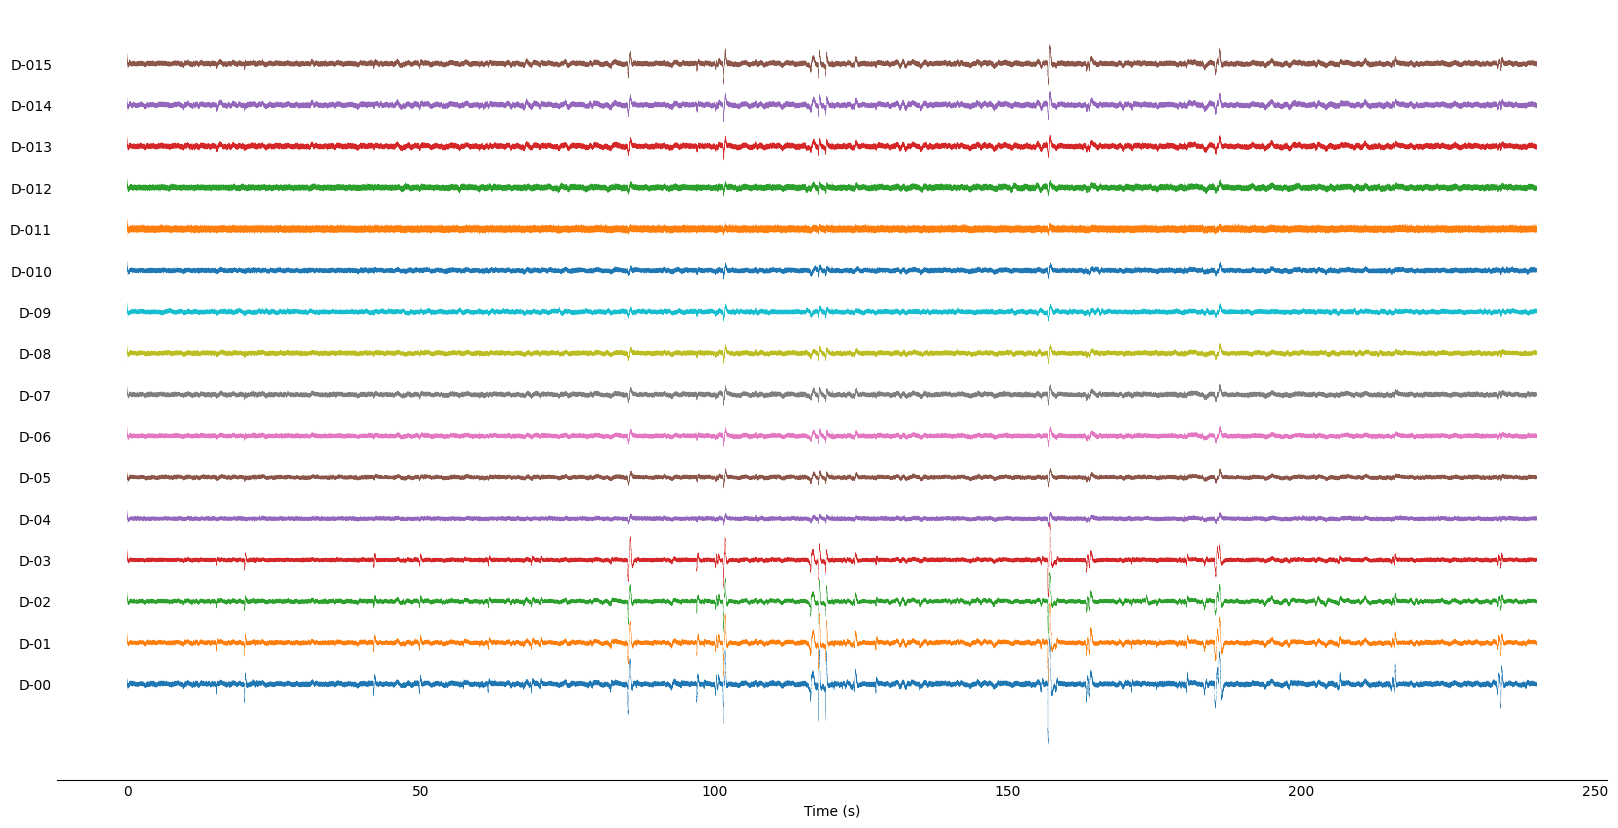

In [5]:
lfp_traces, ti, tf, electrodes = ephys.LFP.Trace.fetch("lfp", "start_time", "end_time", "electrode")
sampling_rate = ephys.LFP.fetch1("lfp_sampling_rate")

idx = np.argsort(electrodes)

labels = np.array([f'D-0{x}' for x in electrodes])

labels = labels[idx]
lfp_traces = lfp_traces[idx]
electrodes = electrodes[idx]

# plot all channels
fig, ax = plt.subplots(figsize=(20, 10))
ytick_loc = []
for i, (lfp_trace, electrode) in enumerate(zip(lfp_traces, electrodes)): 
    ytick_loc.append(i * 500)
    ax.plot(np.r_[:len(lfp_trace)]/sampling_rate, lfp_trace + i * 500 , linewidth=0.1)
ax.set_yticks(ytick_loc)
ax.set_yticklabels([f'D-0{x}' for x in electrodes])
ax.tick_params(length=0)
ax.set(xlabel="Time (s)")
sns.despine(right = True, left = True)
plt.show()

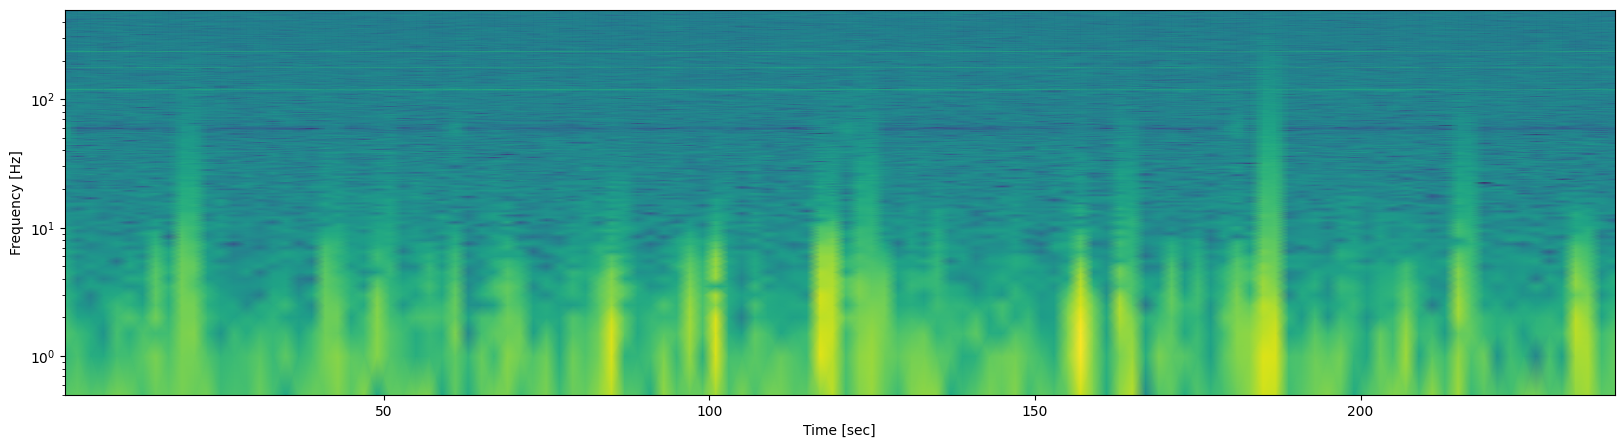

In [6]:
Sxx, t, f = analysis.LFPSpectrogram.ChannelSpectrogram.fetch("spectrogram", "time", "frequency", limit=1)
Sxx = Sxx[0]
t = t[0]
f = f[0]

fig, ax = plt.subplots(figsize=(20, 5))
ax.pcolormesh(t, f[1:1000], np.log(Sxx[1:1000]), shading='gouraud')
plt.yscale("log")
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

In [7]:
analysis.LFPSpectrogram.Power()

induction_id de-identified code,matrigel_id,"experiment_id i.e. rosette id and organoid id, e.g. AS001",experiment_datetime Experiment start time,insertion_number,start_time,end_time,electrode_config_hash,probe_type e.g. neuropixels_1.0,"electrode electrode index, starts at 0",param_idx,band_name,power Power in spectral band as a function of time,mean_power Mean power in a spectral band for a time window.,std_power Standard deviation of the power in a spectral band for a time window.
O6,1,O6,2019-07-22 20:43:31,0,2019-07-22 20:43:31,2019-07-22 20:46:31,f2b8cfac-94cd-2564-da65-60493543f043,NeuroNexus-A4x16-Poly2-5mm,0,0,alpha,=BLOB=,2.57184,8.48894
O6,1,O6,2019-07-22 20:43:31,0,2019-07-22 20:43:31,2019-07-22 20:46:31,f2b8cfac-94cd-2564-da65-60493543f043,NeuroNexus-A4x16-Poly2-5mm,0,0,beta,=BLOB=,0.392622,1.37243
O6,1,O6,2019-07-22 20:43:31,0,2019-07-22 20:43:31,2019-07-22 20:46:31,f2b8cfac-94cd-2564-da65-60493543f043,NeuroNexus-A4x16-Poly2-5mm,0,0,delta,=BLOB=,407.208,1616.76
O6,1,O6,2019-07-22 20:43:31,0,2019-07-22 20:43:31,2019-07-22 20:46:31,f2b8cfac-94cd-2564-da65-60493543f043,NeuroNexus-A4x16-Poly2-5mm,0,0,gamma,=BLOB=,0.117118,0.255858
O6,1,O6,2019-07-22 20:43:31,0,2019-07-22 20:43:31,2019-07-22 20:46:31,f2b8cfac-94cd-2564-da65-60493543f043,NeuroNexus-A4x16-Poly2-5mm,0,0,highgamma,=BLOB=,0.23522,0.017517
O6,1,O6,2019-07-22 20:43:31,0,2019-07-22 20:43:31,2019-07-22 20:46:31,f2b8cfac-94cd-2564-da65-60493543f043,NeuroNexus-A4x16-Poly2-5mm,0,0,theta,=BLOB=,40.3354,144.303
O6,1,O6,2019-07-22 20:43:31,0,2019-07-22 20:43:31,2019-07-22 20:46:31,f2b8cfac-94cd-2564-da65-60493543f043,NeuroNexus-A4x16-Poly2-5mm,1,0,alpha,=BLOB=,1.13055,3.11964
O6,1,O6,2019-07-22 20:43:31,0,2019-07-22 20:43:31,2019-07-22 20:46:31,f2b8cfac-94cd-2564-da65-60493543f043,NeuroNexus-A4x16-Poly2-5mm,1,0,beta,=BLOB=,0.246268,0.620192
O6,1,O6,2019-07-22 20:43:31,0,2019-07-22 20:43:31,2019-07-22 20:46:31,f2b8cfac-94cd-2564-da65-60493543f043,NeuroNexus-A4x16-Poly2-5mm,1,0,delta,=BLOB=,271.325,1064.02
O6,1,O6,2019-07-22 20:43:31,0,2019-07-22 20:43:31,2019-07-22 20:46:31,f2b8cfac-94cd-2564-da65-60493543f043,NeuroNexus-A4x16-Poly2-5mm,1,0,gamma,=BLOB=,0.0788304,0.121082
